# Proyecto 03 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### 1. Preparación del Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import plotly.express as px

In [2]:
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')

In [3]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


periodo       fecha  hora_inicio  hora_fin     dia    estacion    sentido  \
0     2019  2019-01-01            0         1  Martes     Alberti     Centro   
1     2019  2019-01-01            0         1  Martes     Alberti     Centro   
2     2019  2019-01-01            0         1  Martes     Alberti  Provincia   
3     2019  2019-01-01            0         1  Martes     Alberti  Provincia   
4     2019  2019-01-01            0         1  Martes  Avellaneda     Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              22  
1       Liviano    TELEPASE               6  
2       Liviano  NO COBRADO              53  
3       Liviano    TELEPASE              18  
4       Liviano    EFECTIVO              16

In [4]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


periodo       fecha  hora_inicio  hora_fin    dia estacion sentido  \
0     2018  2018-01-01            0         1  Lunes  Alberdi  Centro   
1     2018  2018-01-01            0         1  Lunes  Alberdi  Centro   
2     2018  2018-01-01            1         2  Lunes  Alberdi  Centro   
3     2018  2018-01-01            1         2  Lunes  Alberdi  Centro   
4     2018  2018-01-01            2         3  Lunes  Alberdi  Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              29  
1       Liviano    TELEPASE               9  
2       Liviano  NO COBRADO              73  
3       Liviano    TELEPASE              39  
4       Liviano  NO COBRADO             115

In [5]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


periodo       fecha  hora_inicio  hora_fin      dia estacion sentido  \
0     2017  2017-01-01            0         1  Domingo  Alberdi  Centro   
1     2017  2017-01-01            0         1  Domingo  Alberdi  Centro   
2     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   
3     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   
4     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              25  
1       Liviano    TELEPASE               7  
2       Liviano  NO COBRADO               5  
3       Liviano    EFECTIVO               2  
4       Liviano    EFECTIVO              94

Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [6]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [7]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [8]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [9]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


##### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**


In [10]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head()

fecha  hora_fin     dia    sentido tipo_vehiculo  cantidad_pasos
80   2019-01-01         2  Martes     Centro       Liviano             537
86   2019-01-01         2  Martes     Centro        Pesado               1
88   2019-01-01         2  Martes  Provincia       Liviano             443
94   2019-01-01         2  Martes  Provincia        Pesado               1
149  2019-01-01         3  Martes     Centro       Liviano             769

In [11]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.head()

dia    sentido tipo_vehiculo  cantidad_pasos              fecha2
80   Martes     Centro       Liviano             537 2019-01-01 02:00:00
86   Martes     Centro        Pesado               1 2019-01-01 02:00:00
88   Martes  Provincia       Liviano             443 2019-01-01 02:00:00
94   Martes  Provincia        Pesado               1 2019-01-01 02:00:00
149  Martes     Centro       Liviano             769 2019-01-01 03:00:00

In [12]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

dia    sentido tipo_vehiculo  cantidad_pasos               fecha
80   Martes     Centro       Liviano             537 2019-01-01 02:00:00
86   Martes     Centro        Pesado               1 2019-01-01 02:00:00
88   Martes  Provincia       Liviano             443 2019-01-01 02:00:00
94   Martes  Provincia        Pesado               1 2019-01-01 02:00:00
149  Martes     Centro       Liviano             769 2019-01-01 03:00:00

In [13]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

dia    sentido tipo_vehiculo  cantidad_pasos               fecha
0       Domingo  Provincia        Pesado               1 2017-01-01 00:00:00
1       Domingo  Provincia       Liviano               9 2017-01-01 00:00:00
2       Domingo  Provincia       Liviano             644 2017-01-01 00:00:00
3       Domingo  Provincia        Pesado               6 2017-01-01 00:00:00
4       Domingo  Provincia        Pesado               1 2017-01-01 00:00:00
...         ...        ...           ...             ...                 ...
238864   Martes  Provincia       Liviano             556 2019-12-31 22:00:00
238865   Martes  Provincia        Pesado               1 2019-12-31 22:00:00
238866   Martes     Centro       Liviano             580 2019-12-31 22:00:00
238867   Martes     Centro       Liviano             214 2019-12-31 23:00:00
238868   Martes  Provincia       Liviano             190 2019-12-31 23:00:00

[238869 rows x 5 columns]

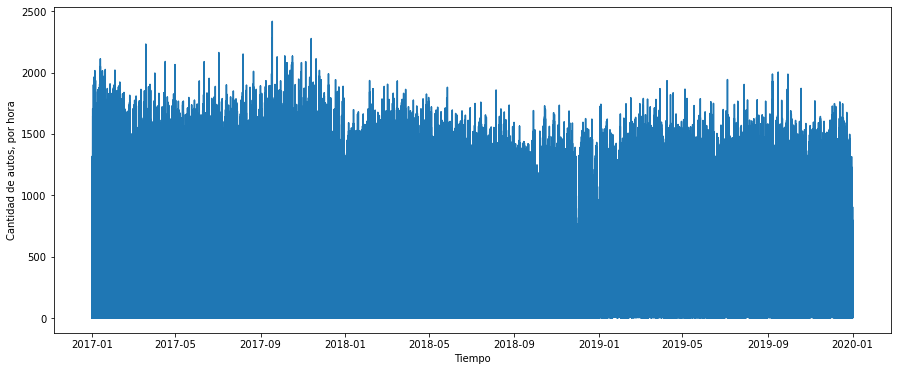

In [14]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

In [15]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


cantidad_pasos
fecha                     
2017-01-01           31183
2017-01-02           51568
2017-01-03           51093
2017-01-04           53332
2017-01-05           56486

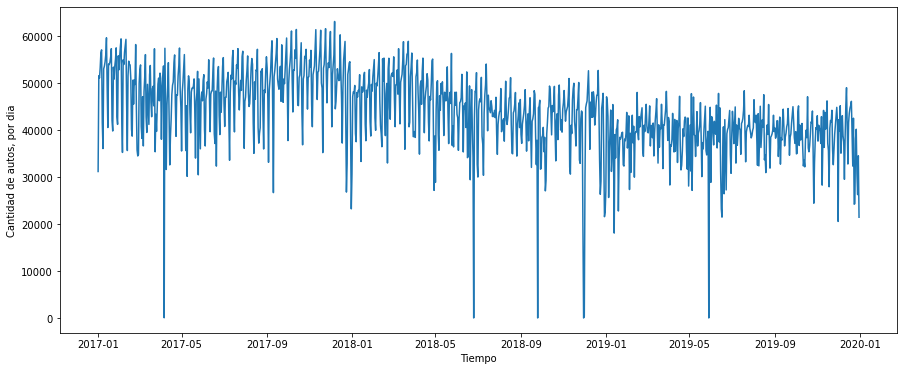

In [16]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

Parte A - Exploración de datos

A continuación continuaré realizando análisis exploratorio de datos, para lograr una mejor comprensión del data set sobre el que trabajaré.

Lo primero que llama la atención de la serie de tiempo son los días en que hubo muy pocos pasos de autos por la estación de peaje.
A continuación intentaré encontrar las explicaciones para dichos días.

In [17]:
pasos_outliers = diario[diario.cantidad_pasos < 1000]  
pasos_outliers

cantidad_pasos
fecha                     
2017-04-06              40
2018-06-25               0
2018-09-25               0
2018-11-30               0
2018-12-01             350
2019-05-29               0

A partir de la información recaba en Google, se obtuvo lo siguiente:

- 06/04/2017: Jueves, Paro general
- 25/06/2018: Lunes, Paro nacional
- 25/09/2018: Martes, Paro nacional
- 30/11/2018: Viernes, Cumbre del G20 en Buenos Aires
- 01/12/2018: Sábado, día posterior a Cumbre del G20
- 29/05/2019: Miércoles, Paro nacional

Estos hechos explican perfectamente porque hubo pocos pasos en el peaje en las mencionadas fechas.

Para estos días con valores atípicos, imputaré el promedio de pasos del respectivo día:

In [18]:
diario.reset_index(inplace=True,drop=False)
diario

fecha  cantidad_pasos
0    2017-01-01           31183
1    2017-01-02           51568
2    2017-01-03           51093
3    2017-01-04           53332
4    2017-01-05           56486
...         ...             ...
1090 2019-12-27           40182
1091 2019-12-28           30681
1092 2019-12-29           26259
1093 2019-12-30           34523
1094 2019-12-31           21447

[1095 rows x 2 columns]

In [19]:
#Agrego una columna 'dia', con el fin de poder calcular el promedio de pasos por día.
diario['dia']=diario['fecha'].dt.dayofweek
diario

fecha  cantidad_pasos  dia
0    2017-01-01           31183    6
1    2017-01-02           51568    0
2    2017-01-03           51093    1
3    2017-01-04           53332    2
4    2017-01-05           56486    3
...         ...             ...  ...
1090 2019-12-27           40182    4
1091 2019-12-28           30681    5
1092 2019-12-29           26259    6
1093 2019-12-30           34523    0
1094 2019-12-31           21447    1

[1095 rows x 3 columns]

Siendo los días:
0: Lunes
1: Martes
2: Miércoles
3: Jueves
4: Viernes
5: Sábado
6: Domingo

In [20]:
#Cálculo del promedio diario
pasosprom_dia = diario.groupby("dia")["cantidad_pasos"].mean()
pasosprom_dia

dia
0    42620.299363
1    43729.624204
2    45676.448718
3    46808.775641
4    49020.974359
5    41293.044872
6    36891.471338
Name: cantidad_pasos, dtype: float64

In [21]:
#genero un dataset con la información generada en la celda anterior
pasos_prom_dia = pd.DataFrame(pasosprom_dia)
pasos_prom_dia.reset_index(inplace=True,drop=False)
pasos_prom_dia.rename(columns = {'cantidad_pasos':'pasos_prom'}, inplace = True)
pasos_prom_dia

dia    pasos_prom
0    0  42620.299363
1    1  43729.624204
2    2  45676.448718
3    3  46808.775641
4    4  49020.974359
5    5  41293.044872
6    6  36891.471338

In [22]:
#genero un dataset con la información relativa a los outliers identificados
dia_outliers = pd.DataFrame(pasos_outliers)
dia_outliers.reset_index(inplace=True,drop=False)
dia_outliers

fecha  cantidad_pasos
0 2017-04-06              40
1 2018-06-25               0
2 2018-09-25               0
3 2018-11-30               0
4 2018-12-01             350
5 2019-05-29               0

In [23]:
#agrego el día de la semana correspondiente
dia_outliers['dia']=dia_outliers['fecha'].dt.dayofweek
dia_outliers

fecha  cantidad_pasos  dia
0 2017-04-06              40    3
1 2018-06-25               0    0
2 2018-09-25               0    1
3 2018-11-30               0    4
4 2018-12-01             350    5
5 2019-05-29               0    2

In [24]:
#asigno a cada fecha outlier los pasos promedios correspondientes
data_outliers = pd.merge(dia_outliers , pasos_prom_dia , on='dia' )
data_outliers

fecha  cantidad_pasos  dia    pasos_prom
0 2017-04-06              40    3  46808.775641
1 2018-06-25               0    0  42620.299363
2 2018-09-25               0    1  43729.624204
3 2018-11-30               0    4  49020.974359
4 2018-12-01             350    5  41293.044872
5 2019-05-29               0    2  45676.448718

In [25]:
data_outliers = pd.DataFrame(data_outliers)
data_outliers.reset_index(inplace=True,drop=False)
data_outliers

index      fecha  cantidad_pasos  dia    pasos_prom
0      0 2017-04-06              40    3  46808.775641
1      1 2018-06-25               0    0  42620.299363
2      2 2018-09-25               0    1  43729.624204
3      3 2018-11-30               0    4  49020.974359
4      4 2018-12-01             350    5  41293.044872
5      5 2019-05-29               0    2  45676.448718

In [26]:
#elimino las columnas no necesarias para la asignación de los promedios
data_outliers = data_outliers.drop(columns=['cantidad_pasos' , 'index' , 'dia'])
data_outliers

fecha    pasos_prom
0 2017-04-06  46808.775641
1 2018-06-25  42620.299363
2 2018-09-25  43729.624204
3 2018-11-30  49020.974359
4 2018-12-01  41293.044872
5 2019-05-29  45676.448718

In [27]:
diario

fecha  cantidad_pasos  dia
0    2017-01-01           31183    6
1    2017-01-02           51568    0
2    2017-01-03           51093    1
3    2017-01-04           53332    2
4    2017-01-05           56486    3
...         ...             ...  ...
1090 2019-12-27           40182    4
1091 2019-12-28           30681    5
1092 2019-12-29           26259    6
1093 2019-12-30           34523    0
1094 2019-12-31           21447    1

[1095 rows x 3 columns]

In [28]:
#a través de merge, genero la columna 'pasos_prom', asignando a todas las fechas del dataset 'diario'
diario = pd.merge(diario, data_outliers , how = 'left', on = 'fecha')

In [29]:
diario

fecha  cantidad_pasos  dia  pasos_prom
0    2017-01-01           31183    6         NaN
1    2017-01-02           51568    0         NaN
2    2017-01-03           51093    1         NaN
3    2017-01-04           53332    2         NaN
4    2017-01-05           56486    3         NaN
...         ...             ...  ...         ...
1090 2019-12-27           40182    4         NaN
1091 2019-12-28           30681    5         NaN
1092 2019-12-29           26259    6         NaN
1093 2019-12-30           34523    0         NaN
1094 2019-12-31           21447    1         NaN

[1095 rows x 4 columns]

In [30]:
diario.loc[~diario.pasos_prom.isna()]

fecha  cantidad_pasos  dia    pasos_prom
95  2017-04-06              40    3  46808.775641
540 2018-06-25               0    0  42620.299363
632 2018-09-25               0    1  43729.624204
698 2018-11-30               0    4  49020.974359
699 2018-12-01             350    5  41293.044872
878 2019-05-29               0    2  45676.448718

In [31]:
#reemplazo el valor outlier en las fechas identificadas, por el promedio
diario.loc[~diario.pasos_prom.isna(),'cantidad_pasos'] = diario[~diario.pasos_prom.isna()].pasos_prom

In [32]:
#elimino la columna 'pasos_prom'
diario = diario.drop(columns=['pasos_prom'])

In [33]:
#dataset después de imputados los promedios a los outliers
diario

fecha  cantidad_pasos  dia
0    2017-01-01         31183.0    6
1    2017-01-02         51568.0    0
2    2017-01-03         51093.0    1
3    2017-01-04         53332.0    2
4    2017-01-05         56486.0    3
...         ...             ...  ...
1090 2019-12-27         40182.0    4
1091 2019-12-28         30681.0    5
1092 2019-12-29         26259.0    6
1093 2019-12-30         34523.0    0
1094 2019-12-31         21447.0    1

[1095 rows x 3 columns]

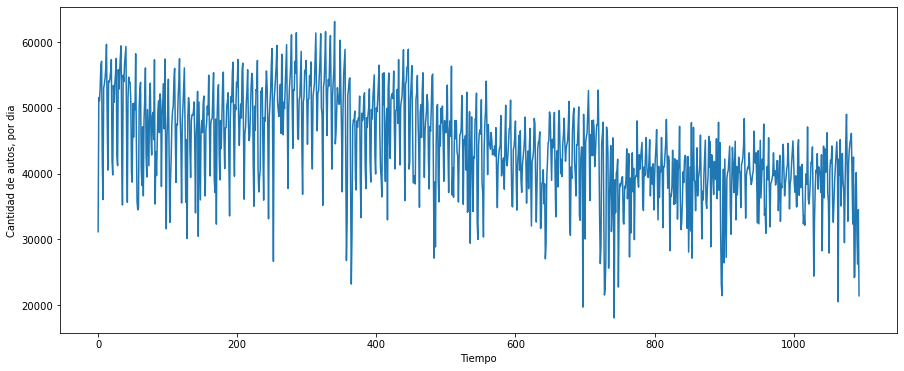

In [34]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

Podemos ver como ahora nuestra serie de tiempo no presenta más los outliers mencionados. También se puede observar gráficamente, una tendencia a la baja de la cantidad de pasos (en la estación Illia y forma de pago: efectivo)

Verifico la inexistencia de valores faltantes:

<AxesSubplot:>

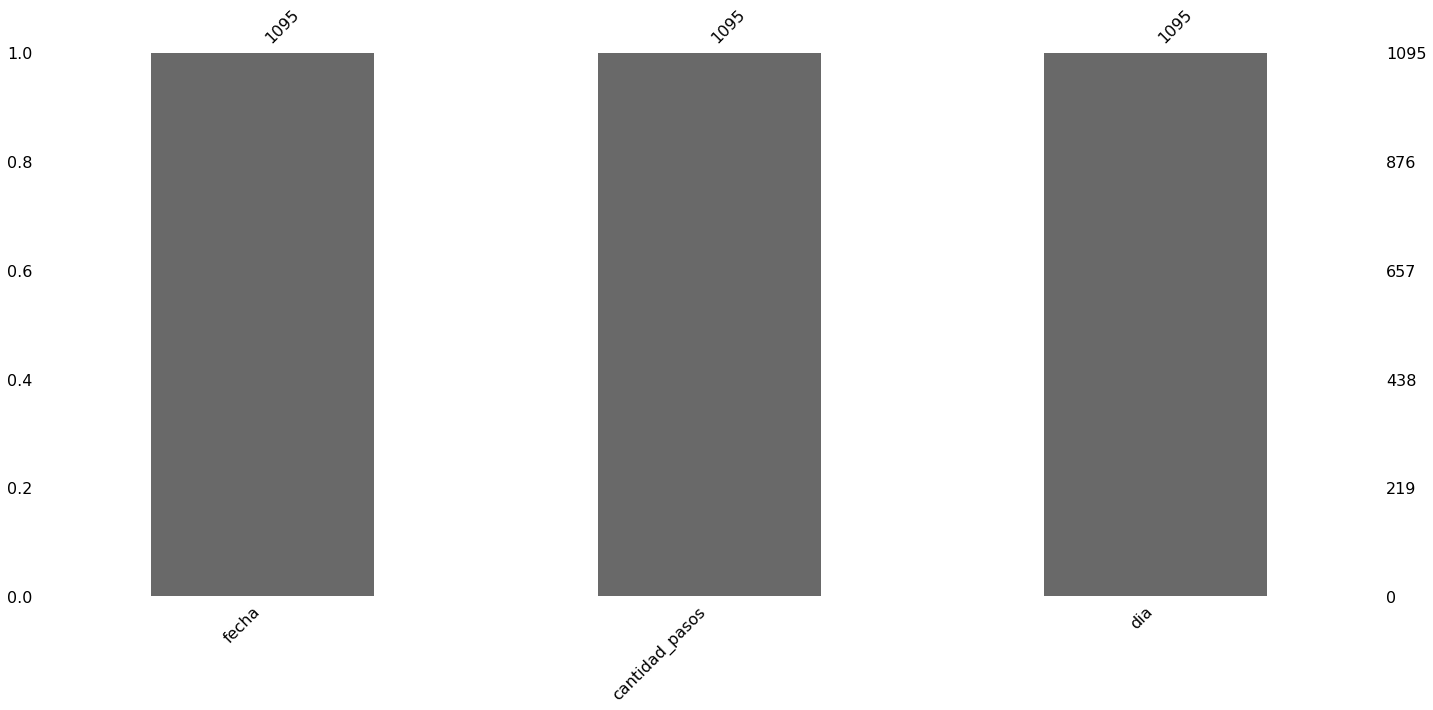

In [35]:
import missingno as msno
msno.bar(diario)

A través de un boxplot, identifico los días con mayor cantidad de tráfico:

In [36]:
import plotly.express as px
fig = px.box(diario, x="dia", y="cantidad_pasos", color='dia')
fig.show()

El gráfico nos muestra como la cantidad de tráfico va en aumento de lunes a viernes, para disminuir durante el fin de semana.

A continuación analizaré los componentes de la serie

In [37]:
#elimino columna no necesaria
diario = diario.drop(columns=['dia'])

In [38]:
#agrego una columna con la fecha en formato numérico
diario['fecha_numeros']=diario.fecha.map(datetime.datetime.toordinal)
diario.head()

fecha  cantidad_pasos  fecha_numeros
0 2017-01-01         31183.0         736330
1 2017-01-02         51568.0         736331
2 2017-01-03         51093.0         736332
3 2017-01-04         53332.0         736333
4 2017-01-05         56486.0         736334

In [39]:
#seteo 'fecha' como índice del DataFrame
diario = diario.set_index('fecha')

In [40]:
diario

cantidad_pasos  fecha_numeros
fecha                                    
2017-01-01         31183.0         736330
2017-01-02         51568.0         736331
2017-01-03         51093.0         736332
2017-01-04         53332.0         736333
2017-01-05         56486.0         736334
...                    ...            ...
2019-12-27         40182.0         737420
2019-12-28         30681.0         737421
2019-12-29         26259.0         737422
2019-12-30         34523.0         737423
2019-12-31         21447.0         737424

[1095 rows x 2 columns]

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(diario.cantidad_pasos, model='additive')

In [42]:
result.trend

fecha
2017-01-01             NaN
2017-01-02             NaN
2017-01-03             NaN
2017-01-04    48904.285714
2017-01-05    49601.714286
                  ...     
2019-12-27    31197.428571
2019-12-28    30801.285714
2019-12-29             NaN
2019-12-30             NaN
2019-12-31             NaN
Name: trend, Length: 1095, dtype: float64

In [43]:
result.seasonal

fecha
2017-01-01   -7021.392573
2017-01-02   -1111.623821
2017-01-03     122.172744
2017-01-04    1961.850532
2017-01-05    3105.688709
                 ...     
2019-12-27    5347.933572
2019-12-28   -2404.629163
2019-12-29   -7021.392573
2019-12-30   -1111.623821
2019-12-31     122.172744
Name: seasonal, Length: 1095, dtype: float64

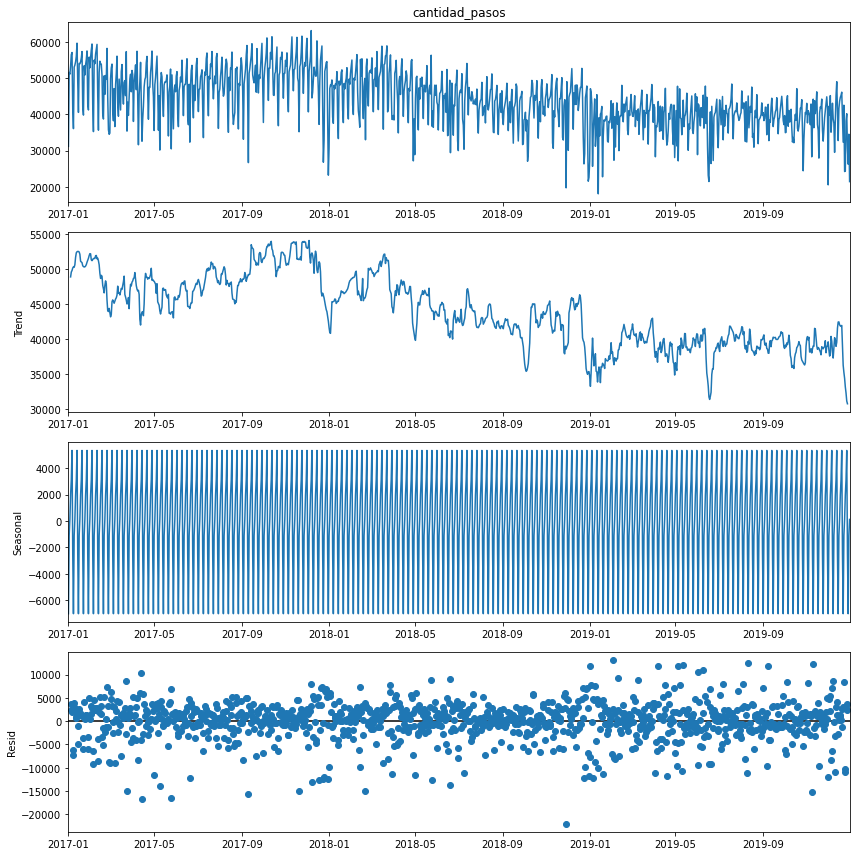

In [44]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12,12]
result.plot()
plt.show()

A partir de la visualización de la tendencia, podemos observar una disminución en la cantidad de pasos por la estación Illia que efectuaron pagos en efectivo. Procederé a analizar esta situación. Retomaré el dataset original para poder observar como se compartan la cantidad de pasos en relación a las distintas formas de pago existentes.

In [45]:
#vuelvo a crear el dataset original para poder analizar la tendencia negativa
dataset2 = pd.concat([data_2019, data_2018, data_2017])
dataset2.head()

periodo       fecha  hora_inicio  hora_fin     dia    estacion    sentido  \
0     2019  2019-01-01            0         1  Martes     Alberti     Centro   
1     2019  2019-01-01            0         1  Martes     Alberti     Centro   
2     2019  2019-01-01            0         1  Martes     Alberti  Provincia   
3     2019  2019-01-01            0         1  Martes     Alberti  Provincia   
4     2019  2019-01-01            0         1  Martes  Avellaneda     Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              22  
1       Liviano    TELEPASE               6  
2       Liviano  NO COBRADO              53  
3       Liviano    TELEPASE              18  
4       Liviano    EFECTIVO              16

In [46]:
dataset2.head()

periodo       fecha  hora_inicio  hora_fin     dia    estacion    sentido  \
0     2019  2019-01-01            0         1  Martes     Alberti     Centro   
1     2019  2019-01-01            0         1  Martes     Alberti     Centro   
2     2019  2019-01-01            0         1  Martes     Alberti  Provincia   
3     2019  2019-01-01            0         1  Martes     Alberti  Provincia   
4     2019  2019-01-01            0         1  Martes  Avellaneda     Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              22  
1       Liviano    TELEPASE               6  
2       Liviano  NO COBRADO              53  
3       Liviano    TELEPASE              18  
4       Liviano    EFECTIVO              16

In [47]:
#realizo un groupby para poder graficar
forma_pago = dataset2.groupby(by=['forma_pago', 'periodo','fecha'])['cantidad_pasos'].sum()
forma_pago = pd.DataFrame(forma_pago)
forma_pago

cantidad_pasos
forma_pago periodo fecha                     
EFECTIVO   2017    2017-01-01          157472
                   2017-01-02          209269
                   2017-01-03          206743
                   2017-01-04          214506
                   2017-01-05          222781
...                                       ...
TELEPASE   2019    2019-12-27          223049
                   2019-12-28          128597
                   2019-12-29           94695
                   2019-12-30          182926
                   2019-12-31           98603

[6559 rows x 1 columns]

In [48]:
forma_pago.reset_index(inplace=True,drop=False)
forma_pago

forma_pago  periodo       fecha  cantidad_pasos
0      EFECTIVO     2017  2017-01-01          157472
1      EFECTIVO     2017  2017-01-02          209269
2      EFECTIVO     2017  2017-01-03          206743
3      EFECTIVO     2017  2017-01-04          214506
4      EFECTIVO     2017  2017-01-05          222781
...         ...      ...         ...             ...
6554   TELEPASE     2019  2019-12-27          223049
6555   TELEPASE     2019  2019-12-28          128597
6556   TELEPASE     2019  2019-12-29           94695
6557   TELEPASE     2019  2019-12-30          182926
6558   TELEPASE     2019  2019-12-31           98603

[6559 rows x 4 columns]

In [49]:
fig = px.line(forma_pago, x='fecha', y='cantidad_pasos', color='forma_pago')
fig.show()

El gráfico nos permite observar que la forma de pago "EFECTIVO" disminuye, mientras que "TELEPASE" se incrementa.
Debido a que el gráfico muestra todos los días de los tres años bajo análisis, no se logra apreciar con tanta claridad. Por esto procederé a utilizar otro formato de fecha para una mejor visualización.

In [50]:
#convierto la columna fecha en datetime y creo la columna fecha3 para que contenga solo año y mes
dataset2['fecha2'] = pd.to_datetime(dataset2['fecha'])
dataset2['fecha3'] = dataset2['fecha2'].dt.strftime('%Y-%m')
dataset2.head()

periodo       fecha  hora_inicio  hora_fin     dia    estacion    sentido  \
0     2019  2019-01-01            0         1  Martes     Alberti     Centro   
1     2019  2019-01-01            0         1  Martes     Alberti     Centro   
2     2019  2019-01-01            0         1  Martes     Alberti  Provincia   
3     2019  2019-01-01            0         1  Martes     Alberti  Provincia   
4     2019  2019-01-01            0         1  Martes  Avellaneda     Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos     fecha2   fecha3  
0       Liviano  NO COBRADO              22 2019-01-01  2019-01  
1       Liviano    TELEPASE               6 2019-01-01  2019-01  
2       Liviano  NO COBRADO              53 2019-01-01  2019-01  
3       Liviano    TELEPASE              18 2019-01-01  2019-01  
4       Liviano    EFECTIVO              16 2019-01-01  2019-01

In [51]:
#vuelvo a realizar el groupby con la nueva fecha definida
forma_pago = dataset2.groupby(by=['forma_pago', 'periodo','fecha3'])['cantidad_pasos'].sum()
forma_pago = pd.DataFrame(forma_pago)
forma_pago

cantidad_pasos
forma_pago periodo fecha3                 
EFECTIVO   2017    2017-01         6343570
                   2017-02         5361559
                   2017-03         5762624
                   2017-04         5354339
                   2017-05         5537223
...                                    ...
TELEPASE   2019    2019-08         5631512
                   2019-09         5542109
                   2019-10         5794271
                   2019-11         5815859
                   2019-12         5586466

[219 rows x 1 columns]

In [52]:
forma_pago.reset_index(inplace=True,drop=False)
forma_pago

forma_pago  periodo   fecha3  cantidad_pasos
0     EFECTIVO     2017  2017-01         6343570
1     EFECTIVO     2017  2017-02         5361559
2     EFECTIVO     2017  2017-03         5762624
3     EFECTIVO     2017  2017-04         5354339
4     EFECTIVO     2017  2017-05         5537223
..         ...      ...      ...             ...
214   TELEPASE     2019  2019-08         5631512
215   TELEPASE     2019  2019-09         5542109
216   TELEPASE     2019  2019-10         5794271
217   TELEPASE     2019  2019-11         5815859
218   TELEPASE     2019  2019-12         5586466

[219 rows x 4 columns]

In [53]:
fig = px.line(forma_pago, x='fecha3', y='cantidad_pasos', color='forma_pago')
fig.show()

A partir del gráfico se puede apreciar como la mayoría de las formas de pago mantienen un comportamiento relativamente constante, excepto por "EFECTIVO" y "TELEPASE". Se puede observar como el primero comienza siendo claramente superior, y a medida que pasa el tiempo empieza a disminuir hasta ser superado por "TELEPASE".
A través de la lectura de diversas noticias pude tomar conocimiento de que la empresa AUSA ha llevado adelante distintos incentivos (como por ejemplo descuentos en TELEPASE) para promover que los usuarios adhieran a dicha forma de pago en lugar de efectivo, lo que explica el comportamiento observado en el gráfico.
Además, a partir de septiembre 2018 (lo que se aprecia en el gráfico) el Registro de la Propiedad Automotor autorizó a los concesionarios viales a tener acceso a la base de datos de patentes de la Argentina, para comenzar a implementar el sistema de cobro automático de peajes por medio de lectura automática de la patente del vehículo. Fuente:https://autoblog.com.ar/2018/09/17/adios-a-las-cabinas-el-gobierno-autorizo-el-cobro-de-peaje-automatico-por-patentes/


El análisis exploratorio de datos realizado hasta acá, permite comprender como fue evolucionando el uso del peaje puntualmente en una estación, pero que podría aplicarse al resto del país. También nos permitió visualizar el comportamiento del tráfico a lo largo de una semana entera, donde tiene una clara tendencia en aumento de lunes a viernes y disminuye el fin de semana.
Ahora que sabemos porque los pagos en efectivo disminuyen a lo largo de la serie de tiempo, proseguiré a enfocarme en la realización de modelos de predicción.

#### Parte B - Modelos de Machine Learning

#### Autocorrelación

In [54]:
from statsmodels.tsa.stattools import acf
nlags =  52
autocorr = acf(diario.cantidad_pasos, nlags = nlags , fft = True)

In [55]:
autocorr.shape

(53,)

Text(0.5, 0, 'lag')

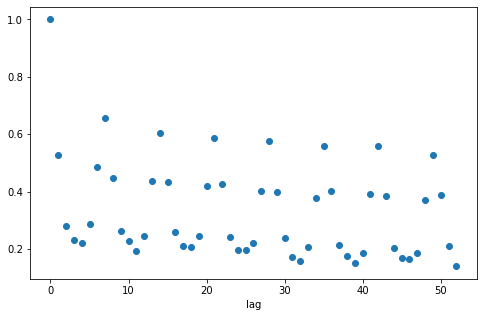

In [56]:
plt.figure(figsize = (8,5))
plt.scatter(np.arange(nlags+1), autocorr)
plt.xlabel('lag')

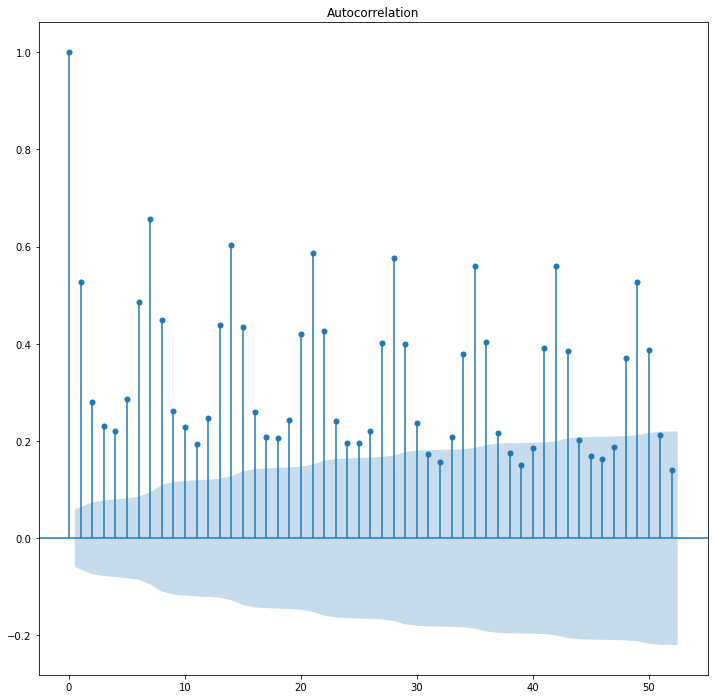

In [57]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(diario.cantidad_pasos, lags = 52)
plt.show()

El gráfico de la autocorrelación tiene picos altos cuando el desfasaje es de 7, 14, 21 dias y así sucesivamente.
Esto nos dice que el fenómeno que estamos observando tiene en parte una naturaleza cíclica: hay un patrón que se repite cada 7 días. Esto es algo que también pudimos observar durante en análisis exploratorio de datos.

Como *benchmark* comenzaré con un modelo de Regresión Lineal, utilizando como *split_date* el *30/09/2019*

In [58]:
diario['fecha_numeros'] = diario.index.map(datetime.datetime.toordinal)

split_date = '2019-09-30'

train = diario.loc[diario.index <= split_date].copy()
test  = diario.loc[diario.index >  split_date].copy()

###### Modelo de Regresión Lineal:

In [59]:
from sklearn.linear_model import LinearRegression
benchmark_rl = LinearRegression()
benchmark_rl.fit(train.fecha_numeros.values.reshape(-1, 1), train.cantidad_pasos)

LinearRegression()

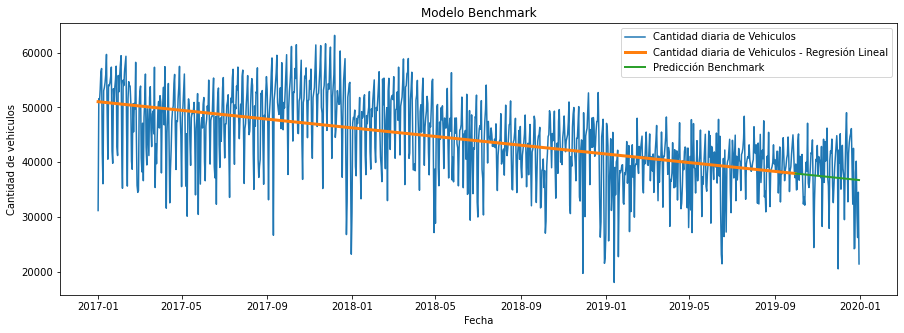

In [60]:
plt.figure(figsize = (15,5))
plt.plot(diario.index, diario.cantidad_pasos, label = 'Cantidad diaria de Vehiculos')
plt.plot(train.index, benchmark_rl.predict(train.fecha_numeros.values.reshape(-1, 1)), lw = 3, label = 'Cantidad diaria de Vehiculos - Regresión Lineal')
plt.plot(test.index,  benchmark_rl.predict(test.fecha_numeros.values.reshape(-1, 1)),  lw = 2, label = 'Predicción Benchmark')

plt.xlabel('Fecha')
plt.ylabel('Cantidad de vehiculos')
plt.legend()
plt.title("Modelo Benchmark")
plt.show()

A continuación evalúo el desempeño del modelo benchmark a partir del calculo del RMSE y el MAE

In [61]:
from sklearn.metrics import mean_squared_error
benchmark_rmse = np.sqrt(mean_squared_error(test.cantidad_pasos, benchmark_rl.predict(test.fecha_numeros.values.reshape(-1, 1))))

print('RMSE modelo Benchmark: %.1f' % benchmark_rmse)


RMSE modelo Benchmark: 5804.1


In [62]:
from sklearn.metrics import mean_absolute_error
benchmark_mae = np.sqrt(mean_absolute_error(test.cantidad_pasos, benchmark_rl.predict(test.fecha_numeros.values.reshape(-1, 1))))
print('MAE: %.3f' % benchmark_mae)

MAE: 67.666


A partir de los resultado obtenidos procederé a realizar un modelo de Machine Learning distinto, intentando mejorar la predicción realizada en el modelo benchmark.
El modelo seleccionado es una regresión lineal en XGBoost.

In [63]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode()
%matplotlib inline

In [64]:
diario.reset_index(inplace=True,drop=False)
diario

fecha  cantidad_pasos  fecha_numeros
0    2017-01-01         31183.0         736330
1    2017-01-02         51568.0         736331
2    2017-01-03         51093.0         736332
3    2017-01-04         53332.0         736333
4    2017-01-05         56486.0         736334
...         ...             ...            ...
1090 2019-12-27         40182.0         737420
1091 2019-12-28         30681.0         737421
1092 2019-12-29         26259.0         737422
1093 2019-12-30         34523.0         737423
1094 2019-12-31         21447.0         737424

[1095 rows x 3 columns]

In [65]:
diario_prophet = diario.drop(columns=['fecha_numeros'])
diario_prophet['ds'] = pd.to_datetime(diario_prophet['fecha'])
diario_prophet = diario_prophet.drop(columns=['fecha'])
diario_prophet = diario_prophet.rename(columns = {'cantidad_pasos':'y'})
diario_prophet

y         ds
0     31183.0 2017-01-01
1     51568.0 2017-01-02
2     51093.0 2017-01-03
3     53332.0 2017-01-04
4     56486.0 2017-01-05
...       ...        ...
1090  40182.0 2019-12-27
1091  30681.0 2019-12-28
1092  26259.0 2019-12-29
1093  34523.0 2019-12-30
1094  21447.0 2019-12-31

[1095 rows x 2 columns]

In [66]:
split_date_2 = '2019-09-30'
diario_prophet1 = diario_prophet.loc[diario_prophet.ds <= split_date_2].copy()
diario_prophet1

y         ds
0     31183.0 2017-01-01
1     51568.0 2017-01-02
2     51093.0 2017-01-03
3     53332.0 2017-01-04
4     56486.0 2017-01-05
...       ...        ...
998   43110.0 2019-09-26
999   44985.0 2019-09-27
1000  41925.0 2019-09-28
1001  38348.0 2019-09-29
1002  37170.0 2019-09-30

[1003 rows x 2 columns]

In [67]:
diario_prophet1 = diario_prophet1[['ds' , 'y']]
diario_prophet1

ds        y
0    2017-01-01  31183.0
1    2017-01-02  51568.0
2    2017-01-03  51093.0
3    2017-01-04  53332.0
4    2017-01-05  56486.0
...         ...      ...
998  2019-09-26  43110.0
999  2019-09-27  44985.0
1000 2019-09-28  41925.0
1001 2019-09-29  38348.0
1002 2019-09-30  37170.0

[1003 rows x 2 columns]

In [68]:
m = Prophet(weekly_seasonality=True,
            daily_seasonality=True )
m.fit(diario_prophet1)

In [69]:
forecast = m.predict(diario_prophet1)

In [70]:
future = m.make_future_dataframe(periods=92)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

ds          yhat    yhat_lower    yhat_upper
0    2017-01-01  39144.646862  33205.553386  44754.661618
1    2017-01-02  45258.721257  39474.185052  50716.325196
2    2017-01-03  46480.003848  40967.656512  52449.660173
3    2017-01-04  48323.125042  42680.901904  54063.500940
4    2017-01-05  49424.105650  43591.265549  55345.502925
...         ...           ...           ...           ...
1090 2019-12-27  43671.255840  37750.664976  49155.393863
1091 2019-12-28  35307.718965  29751.067016  40955.897459
1092 2019-12-29  30350.332479  24362.328282  35922.396289
1093 2019-12-30  36332.883913  30030.896083  42156.366547
1094 2019-12-31  37420.516192  31760.550410  43531.396902

[1095 rows x 4 columns]

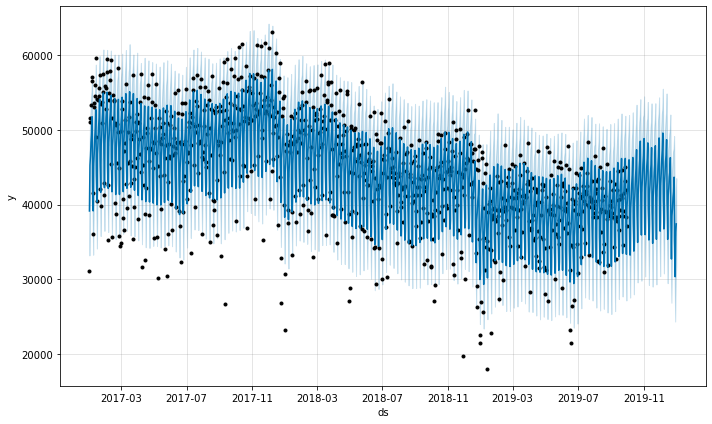

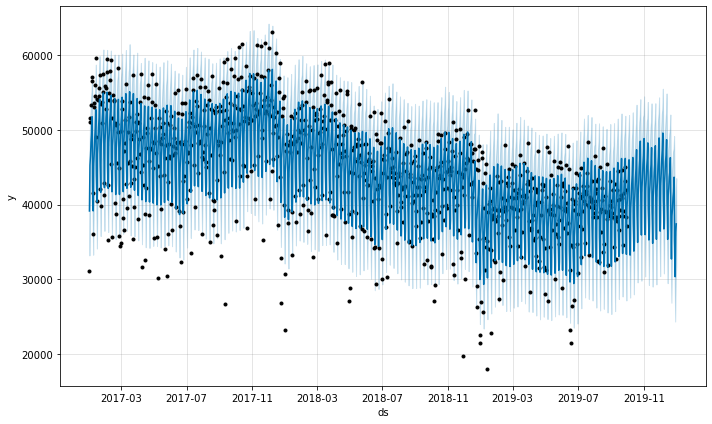

In [71]:
m.plot(forecast)

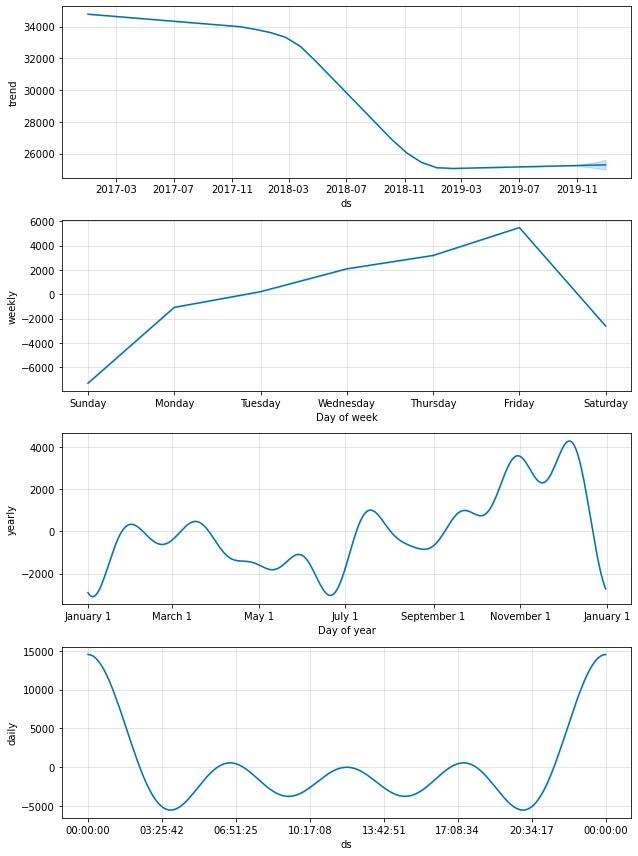

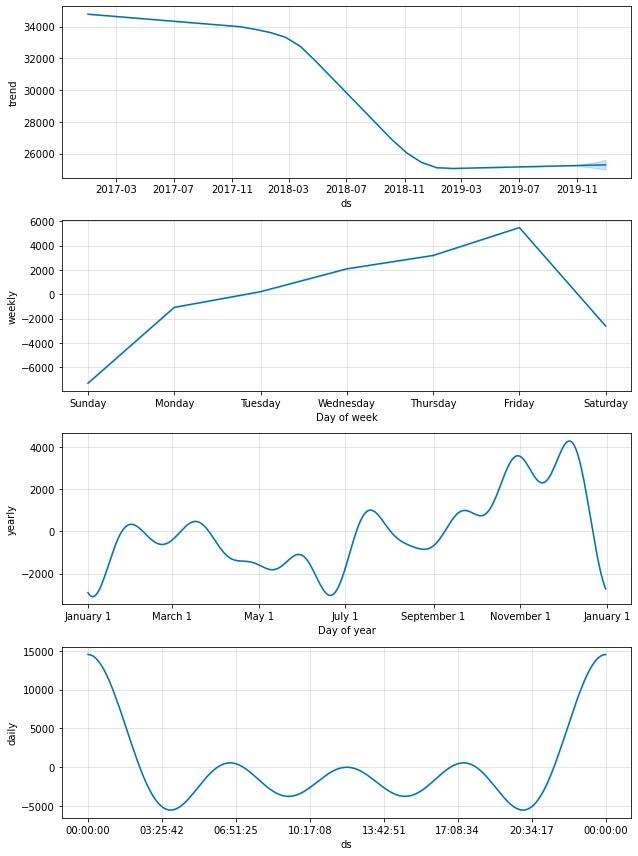

In [72]:
m.plot_components(forecast)

In [73]:
y_true = diario_prophet.loc[diario_prophet.ds > split_date_2].copy()
y_true

y         ds
1003  39669.0 2019-10-01
1004  34943.0 2019-10-02
1005  35054.0 2019-10-03
1006  43775.0 2019-10-04
1007  45150.0 2019-10-05
...       ...        ...
1090  40182.0 2019-12-27
1091  30681.0 2019-12-28
1092  26259.0 2019-12-29
1093  34523.0 2019-12-30
1094  21447.0 2019-12-31

[92 rows x 2 columns]

In [74]:
y_pred = forecast[['ds', 'yhat']].loc[diario_prophet.ds > split_date_2].copy()
y_pred

ds          yhat
1003 2019-10-01  40793.532393
1004 2019-10-02  42639.709402
1005 2019-10-03  43715.883725
1006 2019-10-04  45987.840987
1007 2019-10-05  37920.546843
...         ...           ...
1090 2019-12-27  43671.255840
1091 2019-12-28  35307.718965
1092 2019-12-29  30350.332479
1093 2019-12-30  36332.883913
1094 2019-12-31  37420.516192

[92 rows x 2 columns]

In [75]:
from sklearn.metrics import mean_absolute_error
y_true = y_true['y'].values
y_pred = y_pred['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

MAE: 4732.719


A partir de los resultados obtenidos podemos observar como utilizando el modelo de Prophet, específico para series de tiempo el desempeño es peor que el modelo benchmark seleccionado.

#### Parte C - Conclusiones

¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?

¿Hay algo que te gustaría investigar o probar?


A partir de las investigaciones y pruebas realizadas, considero que una alternativa interesante para buscar un mejor desempeño es a través de un modelo de Árboles de Decisión. 
Mediante este modelo podría incorporar nuevas variables que no fueron tenidas en cuenta en el modelo Benchmark ni en el modelo Prophet, como por ejemplo, los distintos días de la semana, la existencia de feriados, sentido, entre otros.
Considero que al incorporar estas nuevas variables podría lograr un mejor resultado que el obtenido hasta ahora.

##### Link al repositorio en Github

https://github.com/franciscofabbri/Proyecto3